In [2]:
import pandas as pd
import numpy as np


In [3]:
dict={'rollno':[1,2,3,4,5],'name':['gayatri','aditya','varad','gayu','aadi'],'english':[65,76,87,65,np.nan],'maths':[7,np.nan,67,78,92],'sci':[67,np.nan,76,87,98]}

In [4]:
df=pd.DataFrame(dict)

In [5]:
df

,rollno,name,english,maths,sci
0,1,gayatri,65.0,7.0,67.0
1,2,aditya,76.0,NaN,NaN
2,3,varad,87.0,67.0,76.0
3,4,gayu,65.0,78.0,87.0
4,5,aadi,NaN,92.0,98.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rollno   5 non-null      int64  
 1   name     5 non-null      object 
 2   english  4 non-null      float64
 3   maths    4 non-null      float64
 4   sci      4 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 332.0+ bytes


In [7]:
df.describe()

,rollno,english,maths,sci
count,5.000000,4.000000,4.000000,4.00000
mean,3.000000,73.250000,61.000000,82.00000
std,1.581139,10.531698,37.425482,13.44123
min,1.000000,65.000000,7.000000,67.00000
25%,2.000000,65.000000,52.000000,73.75000
50%,3.000000,70.500000,72.500000,81.50000
75%,4.000000,78.750000,81.500000,89.75000
max,5.000000,87.000000,92.000000,98.00000


In [8]:
df.isnull().sum()

rollno     0
name       0
english    1
maths      1
sci        1
dtype: int64

In [9]:
#first method - mean, mode, median
print('\nusing mean : \n',df['english'].fillna(df['english'].mean()))
print('\nusing median : \n',df['maths'].fillna(df['maths'].median()))
print('\nusing mode : \n',df['sci'].fillna(df['sci'].mode().iloc[0]))


using mean : 
 0    65.00
1    76.00
2    87.00
3    65.00
4    73.25
Name: english, dtype: float64

using median : 
 0     7.0
1    72.5
2    67.0
3    78.0
4    92.0
Name: maths, dtype: float64

using mode : 
 0    67.0
1    67.0
2    76.0
3    87.0
4    98.0
Name: sci, dtype: float64


In [10]:
#manually filling null value (for english) in actual data file
df['english'].replace([np.nan],[99],inplace=True)
df

C:\Users\adity\AppData\Local\Temp\ipykernel_15472\2619234330.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['english'].replace([np.nan],[99],inplace=True)


,rollno,name,english,maths,sci
0,1,gayatri,65.0,7.0,67.0
1,2,aditya,76.0,NaN,NaN
2,3,varad,87.0,67.0,76.0
3,4,gayu,65.0,78.0,87.0
4,5,aadi,99.0,92.0,98.0


In [11]:
#second method - backward and forward fill
print('\nusing backward fill : \n',df['maths'].fillna(method='bfill'))
print('\nusing forward fill : \n',df['sci'].fillna(method='ffill'))


using backward fill : 
 0     7.0
1    67.0
2    67.0
3    78.0
4    92.0
Name: maths, dtype: float64

using forward fill : 
 0    67.0
1    67.0
2    76.0
3    87.0
4    98.0
Name: sci, dtype: float64


C:\Users\adity\AppData\Local\Temp\ipykernel_15472\1807376967.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print('\nusing backward fill : \n',df['maths'].fillna(method='bfill'))
C:\Users\adity\AppData\Local\Temp\ipykernel_15472\1807376967.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print('\nusing forward fill : \n',df['sci'].fillna(method='ffill'))


In [12]:
#third method - interpolation
print('\nusing linear interpolation : \n',df['maths'].interpolate(method='linear'))
print('\nusing quadratic interpolation : \n',df['sci'].interpolate(method='quadratic'))


using linear interpolation : 
 0     7.0
1    37.0
2    67.0
3    78.0
4    92.0
Name: maths, dtype: float64

using quadratic interpolation : 
 0    67.000000
1    69.105263
2    76.000000
3    87.000000
4    98.000000
Name: sci, dtype: float64


In [13]:
df

,rollno,name,english,maths,sci
0,1,gayatri,65.0,7.0,67.0
1,2,aditya,76.0,NaN,NaN
2,3,varad,87.0,67.0,76.0
3,4,gayu,65.0,78.0,87.0
4,5,aadi,99.0,92.0,98.0


In [14]:
df.dropna()

,rollno,name,english,maths,sci
0,1,gayatri,65.0,7.0,67.0
2,3,varad,87.0,67.0,76.0
3,4,gayu,65.0,78.0,87.0
4,5,aadi,99.0,92.0,98.0


In [30]:
df

,rollno,name,english,maths,sci,math_normalalized,english_normalized,log_value
0,1,gayatri,65.0,7.0,67.0,-1.442867,0.000000,0.000000
1,2,aditya,76.0,NaN,NaN,NaN,0.323529,0.280302
2,3,varad,87.0,67.0,76.0,0.160319,0.647059,0.498991
3,4,gayu,65.0,78.0,87.0,0.454236,0.000000,0.000000
4,5,aadi,99.0,92.0,98.0,0.828313,1.000000,0.693147


<Axes: >

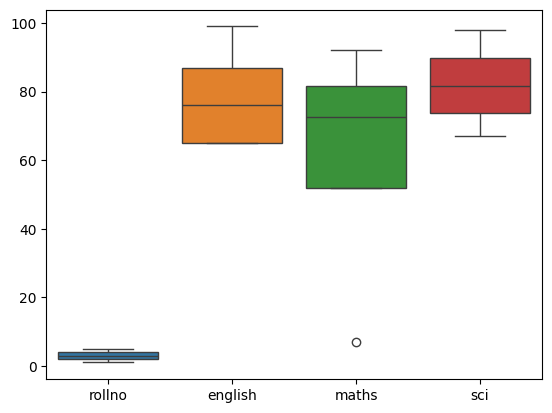

In [15]:
import seaborn as sns
sns.boxplot(df)

In [16]:
Q1=df['maths'].quantile(0.25)
Q3=df['maths'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df_cleaned=df[ (df['maths']>=lower_bound) & (df['maths']<=upper_bound) ]

In [17]:
df_cleaned

,rollno,name,english,maths,sci
2,3,varad,87.0,67.0,76.0
3,4,gayu,65.0,78.0,87.0
4,5,aadi,99.0,92.0,98.0


<Axes: >

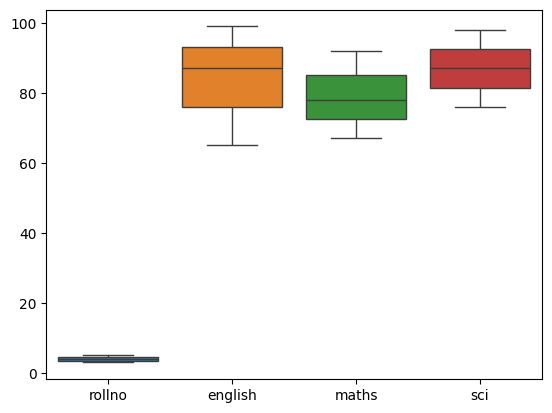

In [18]:
sns.boxplot(df_cleaned)

In [19]:
df['maths'].skew()

-1.5584705613206673

[]

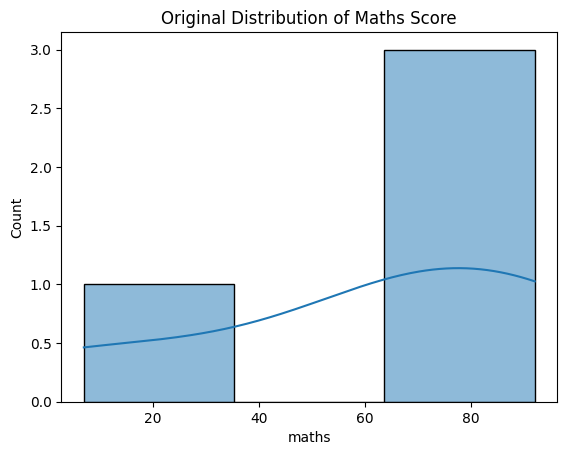

In [20]:
import matplotlib.pyplot as plt
sns.histplot(df['maths'],kde=True)
plt.title('Original Distribution of Maths Score')
plt.plot()

In [21]:
df['math_normalalized']=(df['maths']-df['maths'].mean())/df['maths'].std()
df

,rollno,name,english,maths,sci,math_normalalized
0,1,gayatri,65.0,7.0,67.0,-1.442867
1,2,aditya,76.0,NaN,NaN,NaN
2,3,varad,87.0,67.0,76.0,0.160319
3,4,gayu,65.0,78.0,87.0,0.454236
4,5,aadi,99.0,92.0,98.0,0.828313


[]

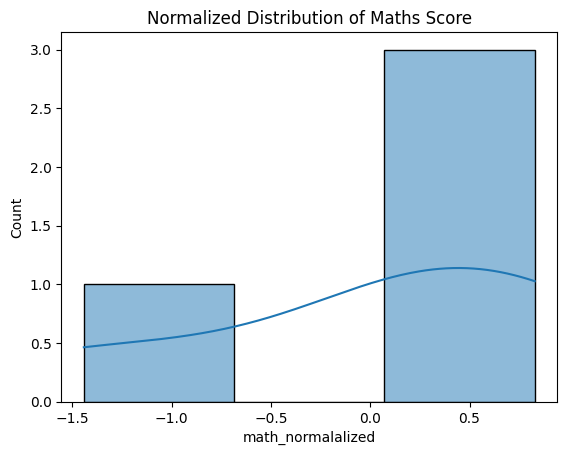

In [22]:
sns.histplot(df['math_normalalized'],kde=True)
plt.title('Normalized Distribution of Maths Score')
plt.plot()

In [23]:
df['math_normalalized'].skew()

-1.558470561320667

[]

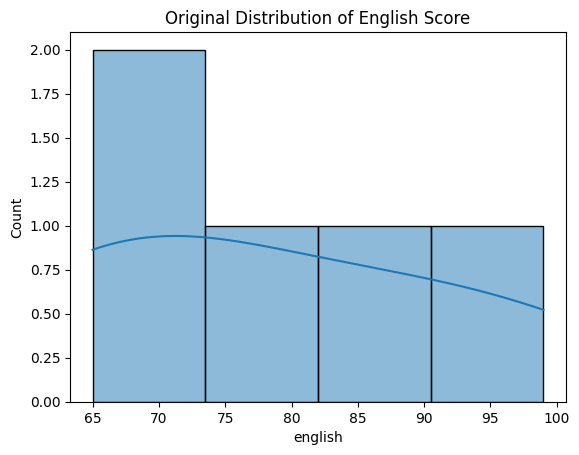

In [24]:
sns.histplot(df['english'],kde=True)
plt.title('Original Distribution of English Score')
plt.plot()

In [25]:
df['english_normalized']=(df['english']-df['english'].min())/(df['english'].max()-df['english'].min())
df

,rollno,name,english,maths,sci,math_normalalized,english_normalized
0,1,gayatri,65.0,7.0,67.0,-1.442867,0.000000
1,2,aditya,76.0,NaN,NaN,NaN,0.323529
2,3,varad,87.0,67.0,76.0,0.160319,0.647059
3,4,gayu,65.0,78.0,87.0,0.454236,0.000000
4,5,aadi,99.0,92.0,98.0,0.828313,1.000000


[]

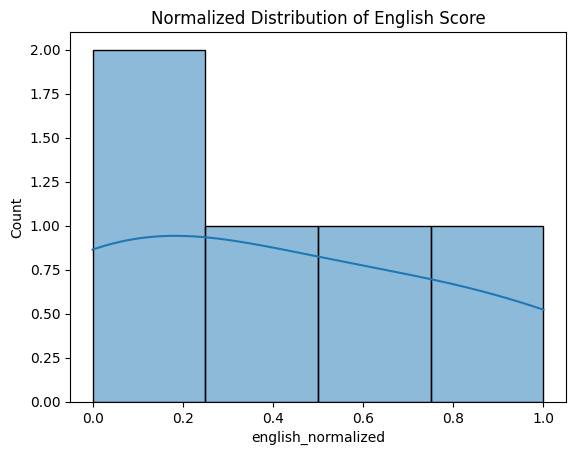

In [26]:
sns.histplot(df['english_normalized'],kde=True)
plt.title('Normalized Distribution of English Score')
plt.plot()

In [27]:
#normalization just bring scale smaller e.g. between [0,1] AND skewness remains unchanged

df['english'].skew()

0.5982718732617297

In [28]:
df['english_normalized'].skew()

0.5982718732617308

In [29]:
df['log_value']=np.log1p(df['english_normalized'])
df

,rollno,name,english,maths,sci,math_normalalized,english_normalized,log_value
0,1,gayatri,65.0,7.0,67.0,-1.442867,0.000000,0.000000
1,2,aditya,76.0,NaN,NaN,NaN,0.323529,0.280302
2,3,varad,87.0,67.0,76.0,0.160319,0.647059,0.498991
3,4,gayu,65.0,78.0,87.0,0.454236,0.000000,0.000000
4,5,aadi,99.0,92.0,98.0,0.828313,1.000000,0.693147
